In [110]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import  IsolationForest
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv('https://github.com/JarFraud/FraudDetection/raw/master/data_FraudDetection_JAR2020.csv')

In [6]:
df

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,dp,ib,invt,ivao,ivst,lct,lt,ni,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,dch_wc,ch_rsst,dch_rec,dch_inv,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,32.853,17.691,1.971,1.431,2.355,0.000,0.000,8.382,26.073,2.135,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000,0.069595,0.046043,0.041935,0.033034,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,2.017,5.871,0.700,-1.869,0.663,0.132,0.000,1.246,7.117,-1.869,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188,-0.065604,-0.240937,-0.006248,-0.026684,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,6.500,37.603,6.271,1.722,4.292,12.989,2.913,32.615,73.727,2.574,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125,0.092822,0.020143,0.002156,0.002746,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,0.587,8.906,1.325,0.422,15.463,0.000,0.000,16.208,25.545,0.422,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562,0.014060,0.035120,0.035583,0.008332,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,0.000,0.266,2.711,-23.577,8.971,0.000,0.000,39.418,39.684,-22.812,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125,-0.540503,-0.575325,-0.102153,-0.222022,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,2014,314866,NaN,0,262.600,12.400,1234.800,194.100,166.200,214.400,97.748,23.200,585.600,499.200,33.800,-90.400,0.000,9.200,0.000,413.100,1040.700,-90.400,191.100,0.000,-404.000,80.800,474.600,323.800,1.700,25.700,54.600,19.150,-0.010251,0.204761,0.011437,0.000000,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,315318,NaN,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,182.067,15.100,678.800,1400.800,86.700,-29.900,205.800,2.300,600.000,242.600,2005.000,-29.900,193.100,0.000,-354.700,327.300,843.200,1512.600,16.700,-6.700,38.700,23.220,0.063226,0.341147,0.054938,0.034174,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,316056,NaN,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,95.831,49.600,956.300,1215.000,44.000,186.300,360.600,23.500,0.000,531.300,1997.400,175.200,586.800,0.000,-5.800,259.900,2118.300,14.100,36.300,84.200,49.300,55.460,-0.011512,0.011762,-0.003103,0.023024,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569
146043,2014,317260,NaN,0,51.743,1.555,322.421,319.230,46.398,24.319,23.431,0.000,40.000,0.000,11.393,6.931,0.235,0.000,0.000,3.191,3.191,6.931,281.874,0.000,0.000,3.103,52.789,100.199,1.212,1.212,1.144,12.280,0.011416,0.495038,0.006844,-0.000296,0.018001,NaN,NaN,NaN,1,1.109467,NaN,0.000000,0.028804,NaN


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

In [8]:
df.misstate.value_counts()

0    145081
1       964
Name: misstate, dtype: int64

In [13]:
all_ft = ['act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf']

In [ ]:
df[df['misstate']==1][all_ft].describe()

,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,...,964.000000,922.000000,919.000000,924.000000,964.000000,964.000000,946.000000,964.000000,964.000000,944.000000
mean,1762.244718,538.289043,5567.469905,2193.053638,463.983886,3164.789631,194.592115,255.179908,454.354580,1294.284392,...,0.634767,0.382280,-0.095292,-0.012586,0.962656,0.522779,1.042297,-0.312409,-0.024095,-0.103947
std,5047.018857,1786.582556,22281.640805,11823.324357,1964.017520,9184.323888,590.181611,914.248930,1969.306734,5258.411901,...,0.221423,1.214934,2.361857,0.215531,0.189703,0.675489,0.444576,3.753444,0.499045,0.323596
min,0.008000,0.000000,0.147000,-3539.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,48.297500,5.651500,87.456000,40.309750,4.289500,37.338250,13.705000,0.256000,0.000000,0.452000,...,0.490044,0.008866,-0.223070,-0.053010,1.000000,0.206795,0.866574,-0.182893,-0.012472,-0.166117
50%,220.104500,25.575000,491.191500,241.603000,44.142000,229.084000,33.642000,4.445000,8.536500,50.858000,...,0.683939,0.150633,-0.026883,-0.004837,1.000000,0.377073,0.980179,0.083526,0.064219,-0.050501
75%,1105.712250,170.786000,2626.729500,970.454250,219.952250,1352.425500,107.733250,43.406000,170.393000,506.833500,...,0.807266,0.433720,0.129397,0.028249,1.000000,0.676198,1.103944,0.234146,0.116144,0.011980
max,64592.000000,18918.426000,331645.000000,181494.000000,33245.000000,97981.000000,6522.248000,9232.000000,28445.000000,88570.000000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,1.314497


In [100]:
df[[*all_ft,'misstate']].groupby(['misstate']).describe()

act                                                                                  ap                                                                          at                                                                                ceq                                                                                   che                                                                         cogs                                                                                   csho                                                                            dlc                                                                    dltis                                                                         dltt                                                                          dp                                                                            ib                                                                           invt              \
             count         mean          std    min      25%       50%         75%       max     count        mean          std  min     25%     50%      75%        max     count         mean           std    min     25%       50%        75%       max     count         mean           std      min       25%      50%        75%       max     count        mean          std   min     25%     50%        75%      max     count         mean          std      min       25%      50%        75%         max     count        mean         std   min     25%     50%        75%         max     count        mean          std    min    25%    50%     75%      max     count        mean          std     min  25%     50%      75%         max     count         mean          std  min    25%     50%       75%       max     count        mean         std    min      25%      50%       75%      max     count       mean          std       min      25%    50%      75%       max     count        mean   
misstate                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0         145081.0   731.041087  3733.452544 -0.254   8.2030   46.9550   246.95700  152629.0  145081.0  179.626059  1040.484709  0.0  1.1420   6.398   41.827  39903.000  145081.0  2352.822637  11856.387321  0.000  18.108  104.4010   665.2840  410074.0  145081.0   878.448925   4980.295668 -25560.0   6.26400   46.791  268.18100  284434.0  145081.0  217.027097  1325.126328 -34.0  1.1360   9.284   59.63800  85709.0  145081.0  1289.905197  7859.763973 -366.645   6.72700   52.834   369.0570  435726.253  145081.0   96.356168  540.475518  0.00   8.775  22.485   60.55500  100092.395  145081.0  126.377926  1023.725669 -0.069  0.008  1.351  12.630  75553.0  145081.0  199.630989  1625.850280 -19.687  0.0  0.0570   24.256  188791.978  145081.0   533.354943  2634.169096  0.0  0.000   4.404  124.9910  120274.0  145081.0  112.620364  663.682009 -4.385  0.52600   3.8800  27.72100  32301.2  145081.0  99.249809   916.601844 -30138.59 -3.82000  0.692  20.3660  104821.0  145081.0  166.123601   
1            964.0  1762.244718  5047.018857  0.008  48.297

In [180]:
df_1=df[df['misstate']==1][all_ft]
df_0=df[df['misstate']==0][all_ft]


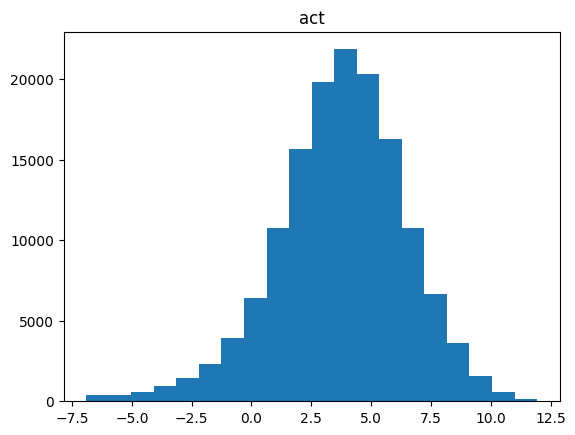

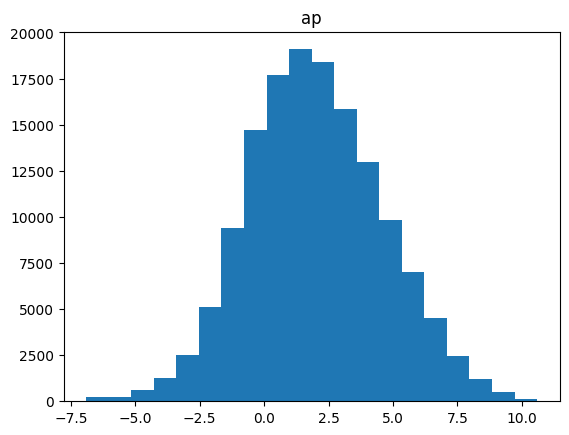

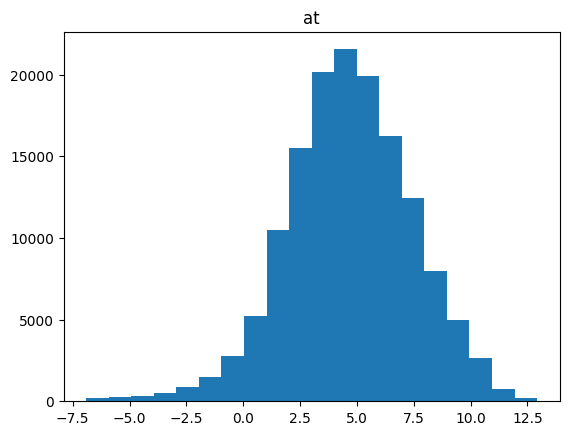

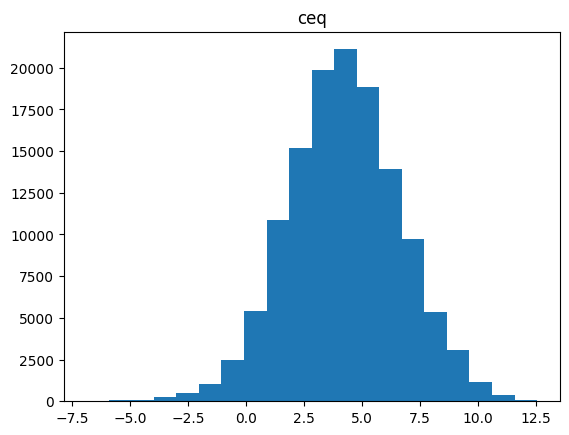

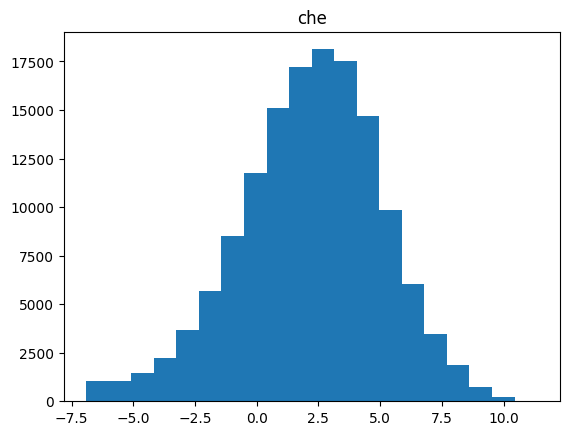

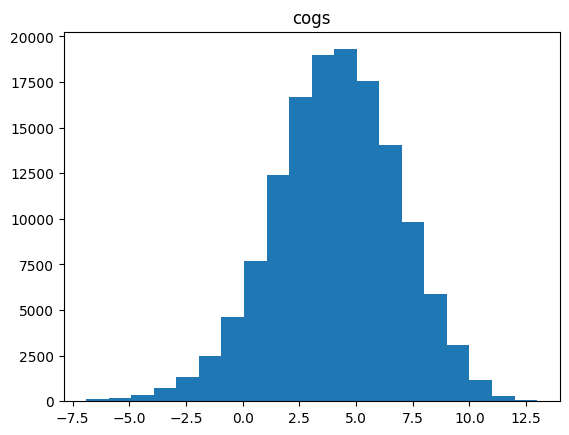

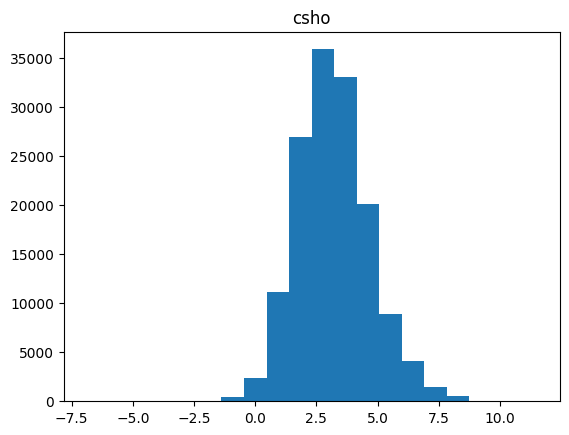

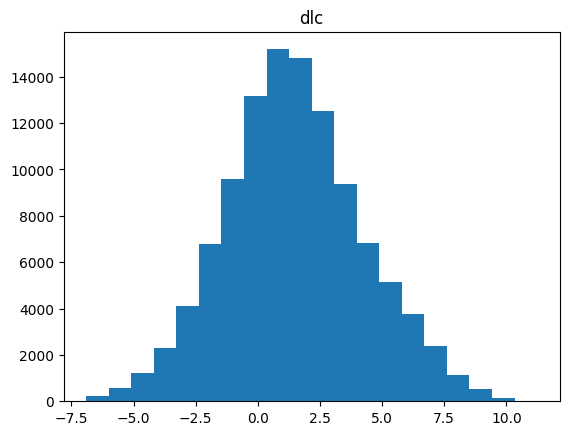

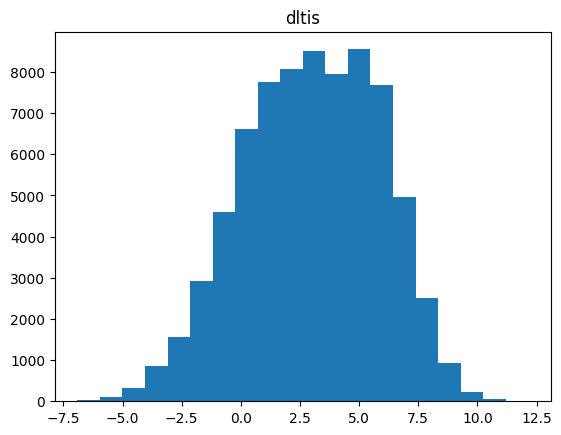

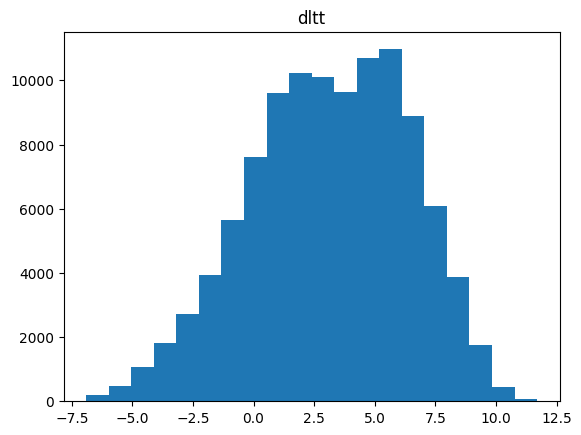

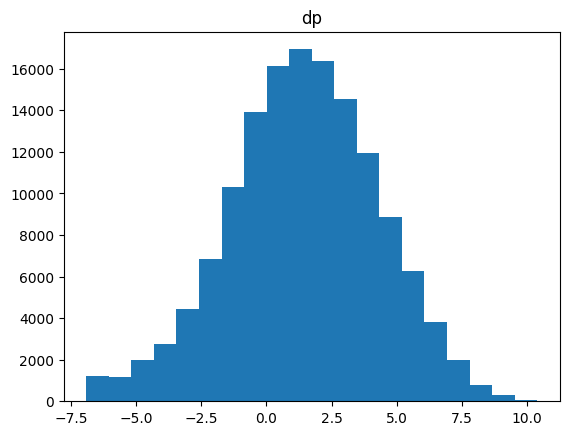

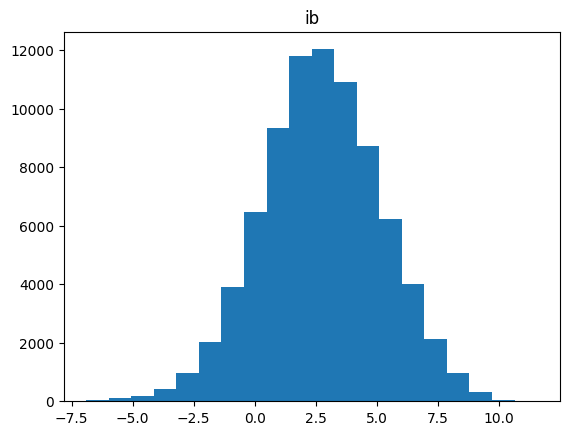

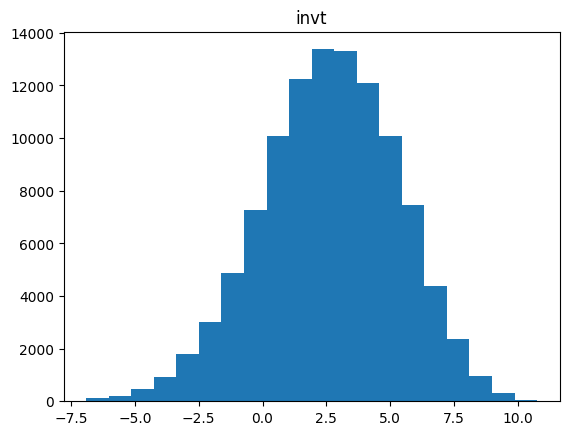

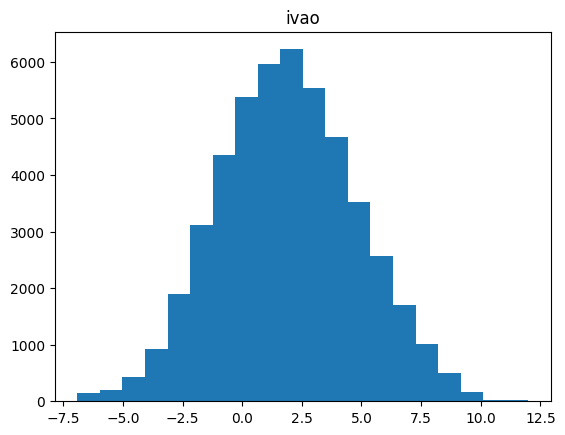

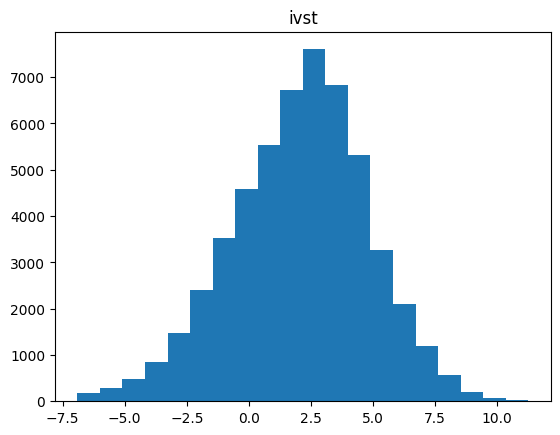

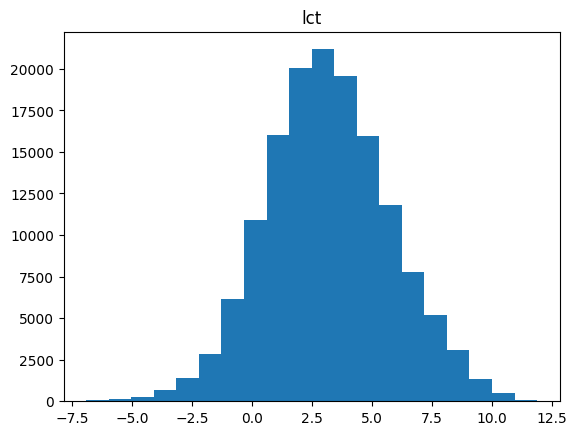

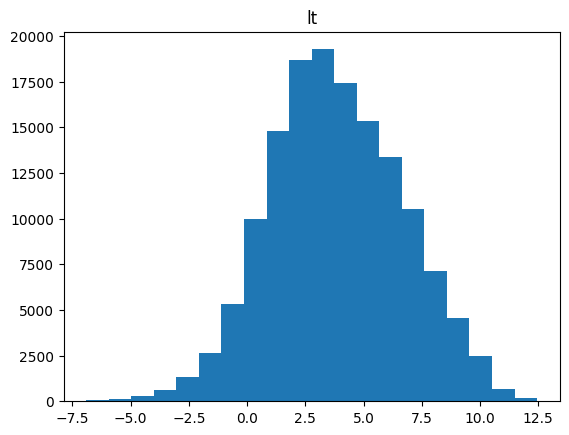

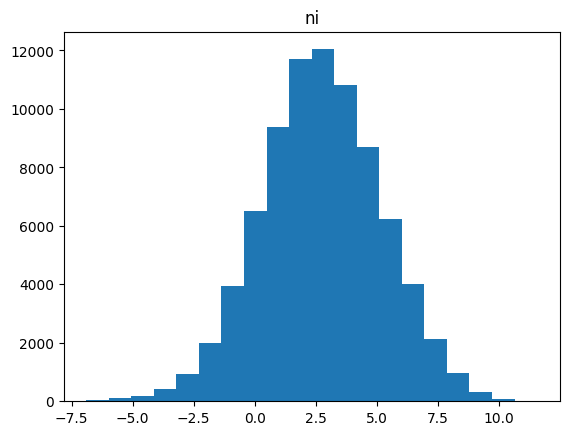

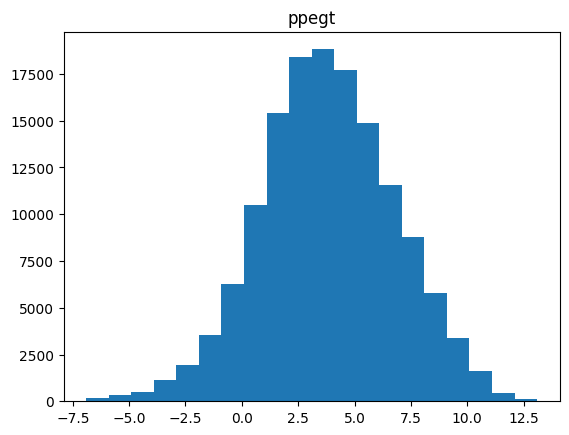

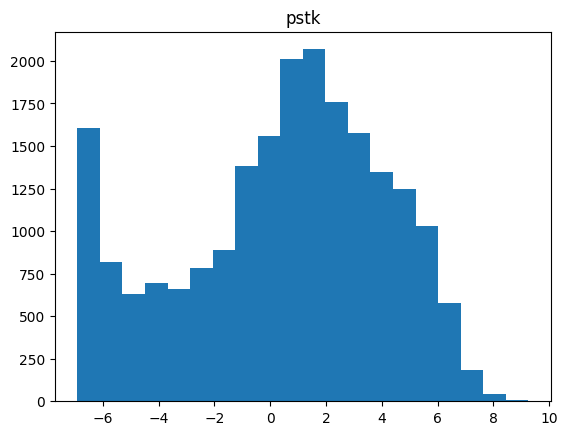

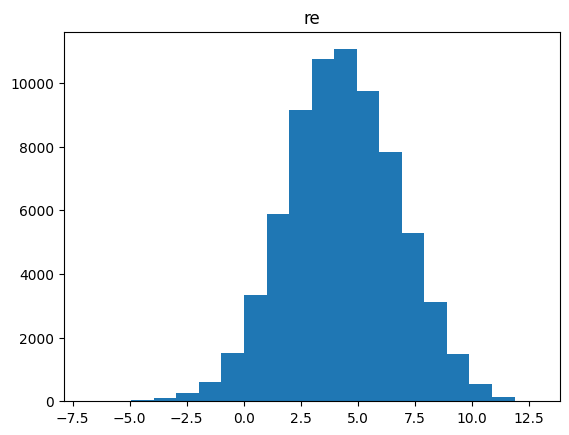

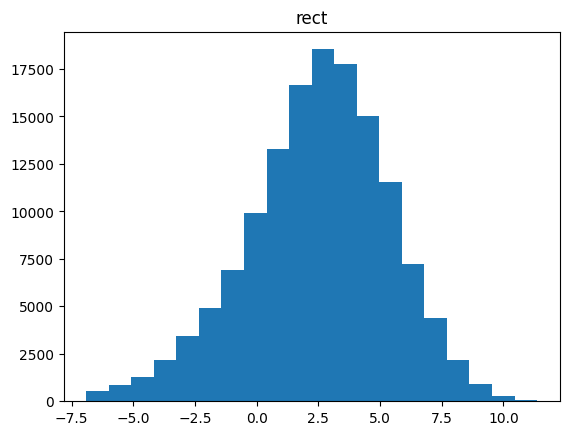

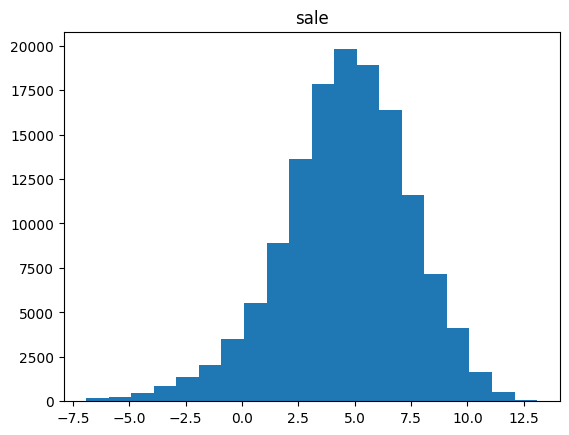

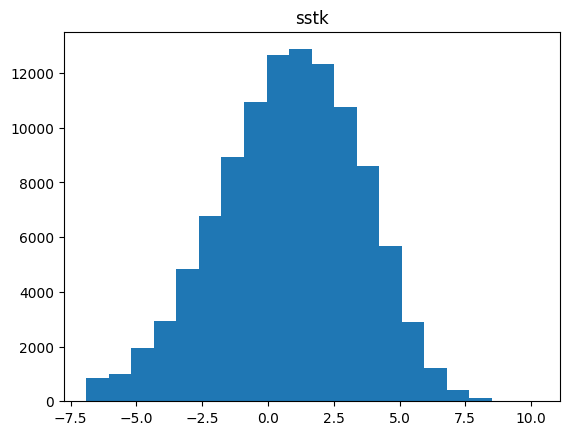

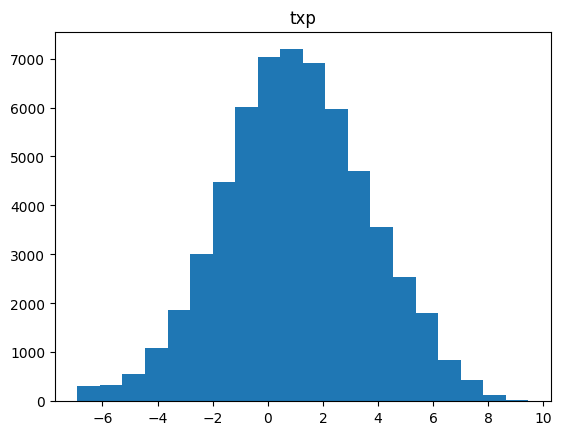

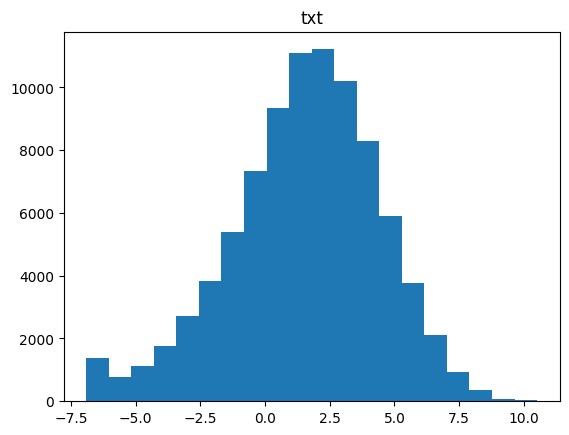

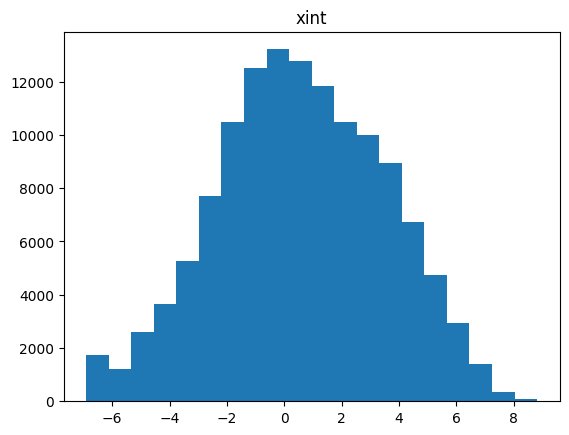

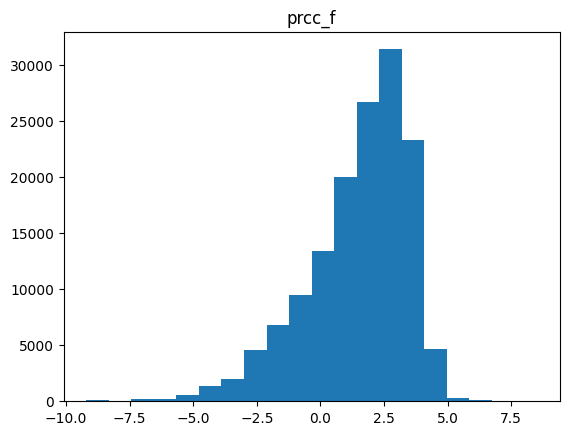

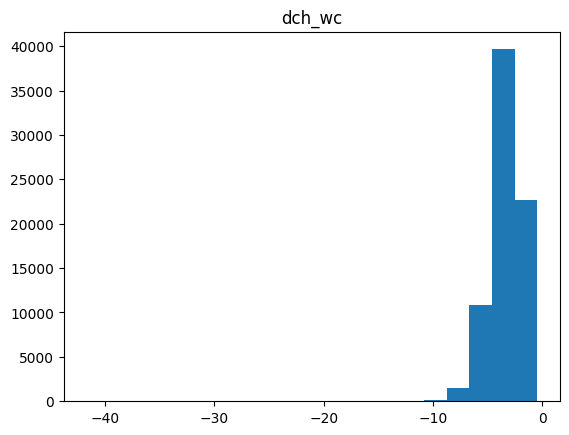

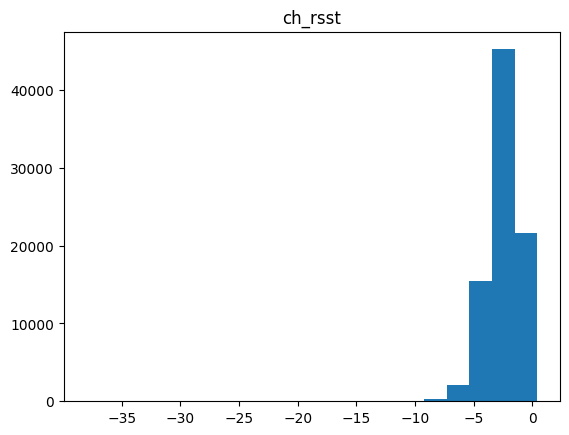

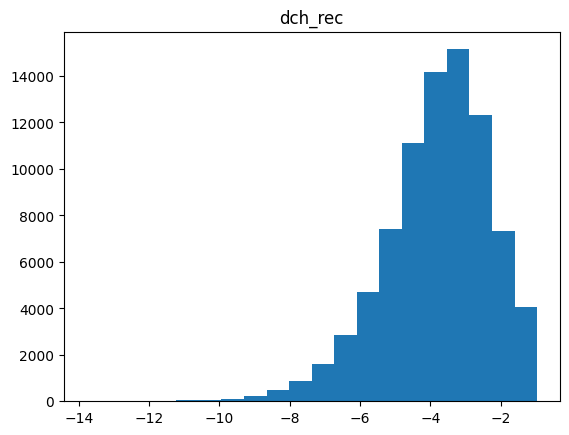

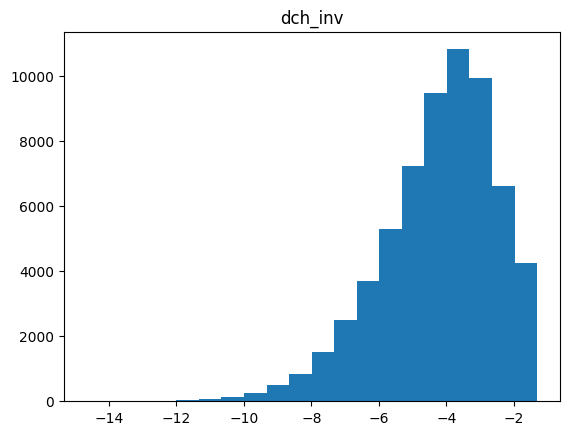

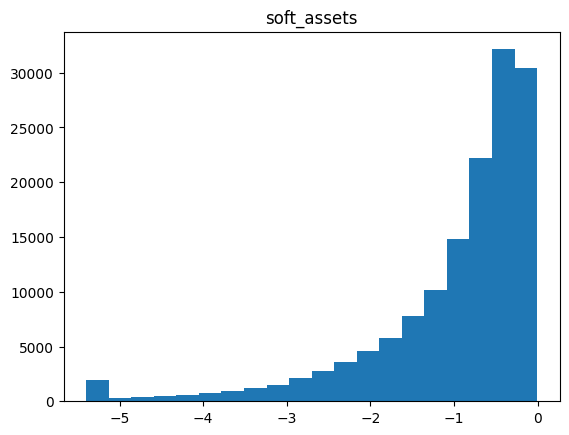

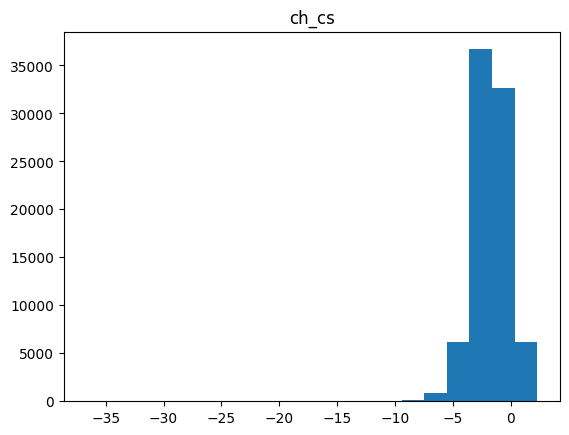

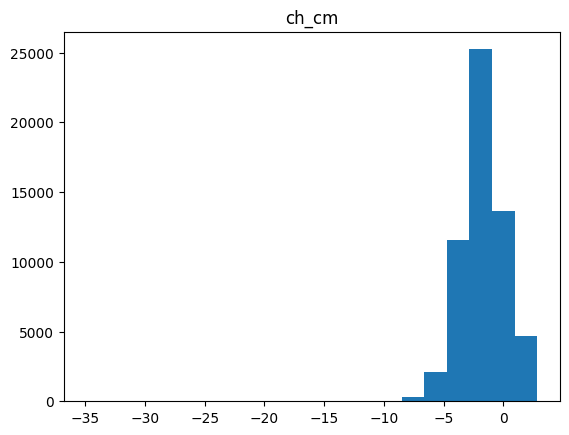

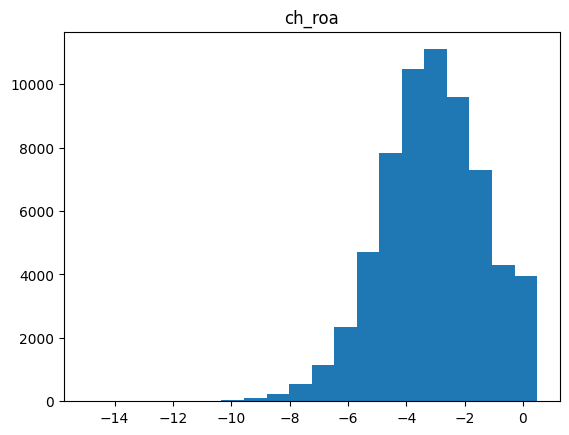

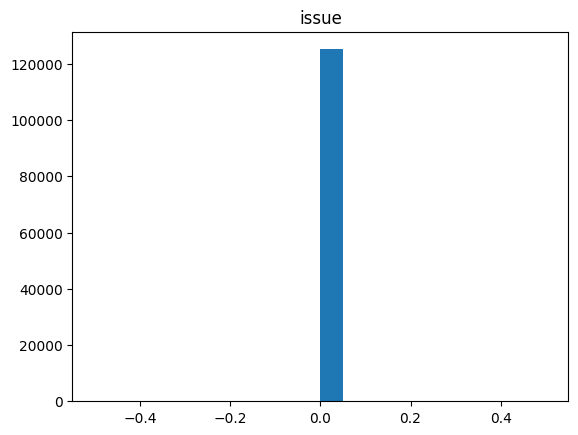

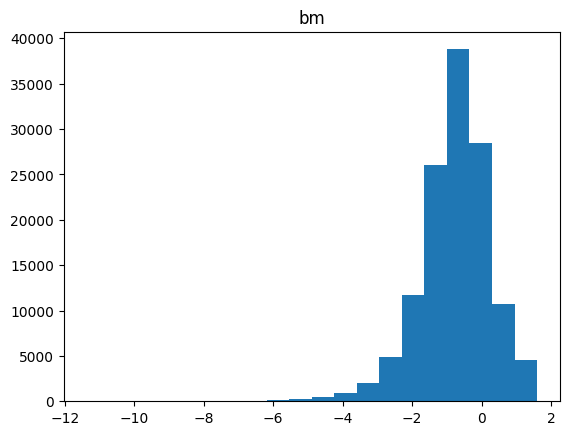

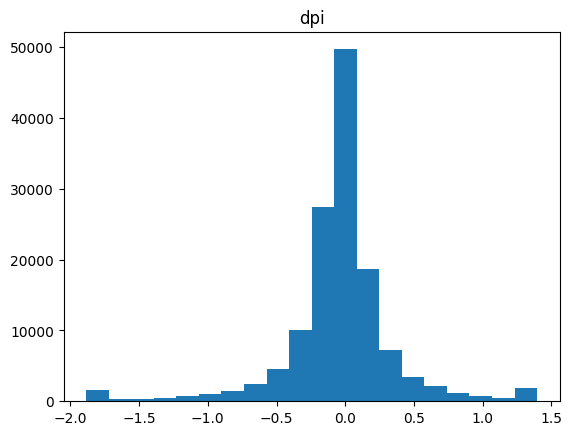

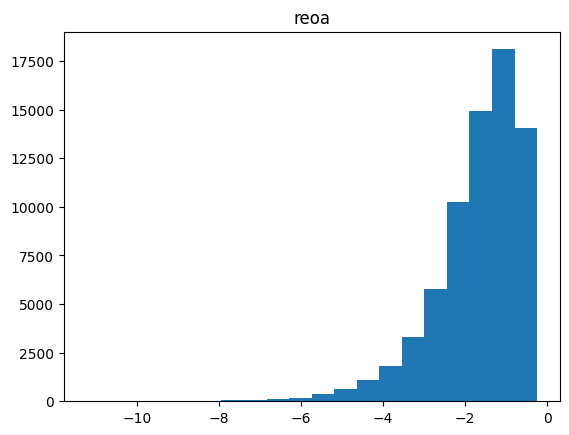

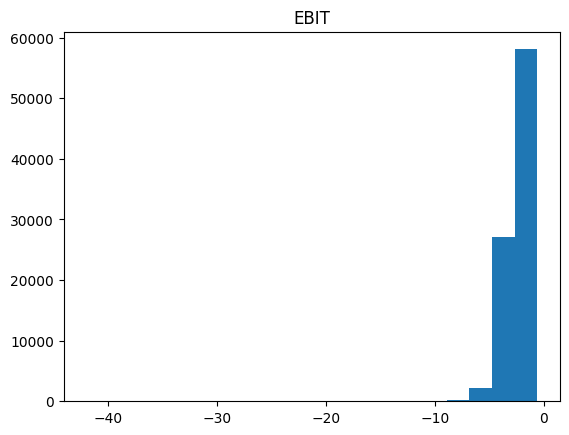

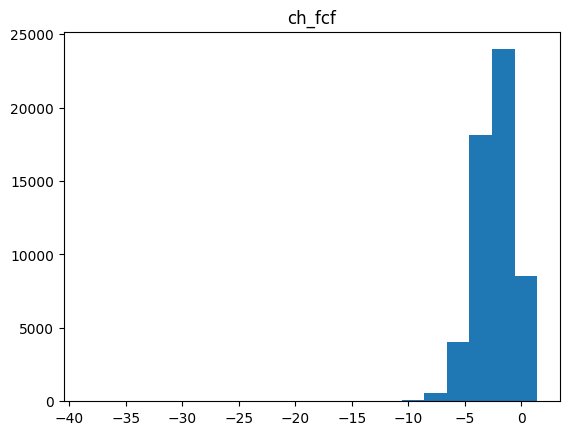

In [181]:
for cat in all_ft:
    plt.hist(df_0[cat].apply(lambda x: np.nan if x ==0 else np.log(x)),bins=20);
    plt.title(cat);
    plt.show();

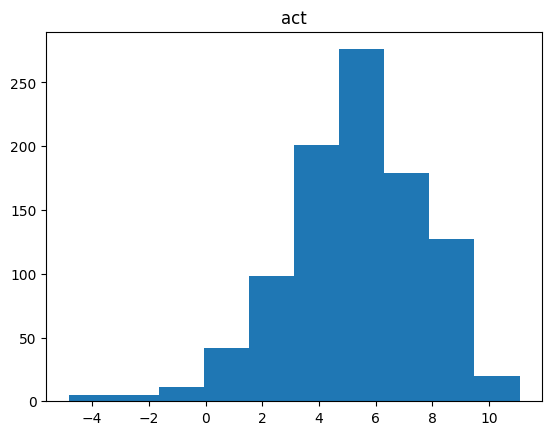

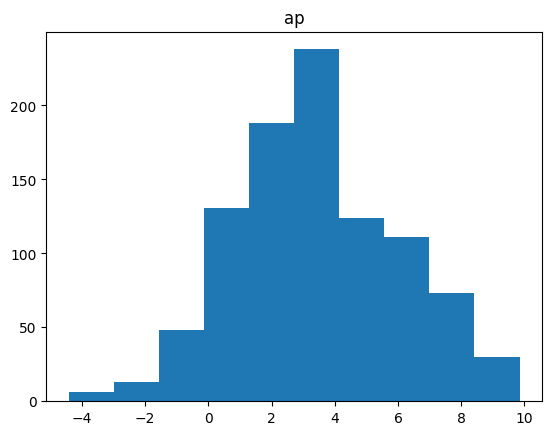

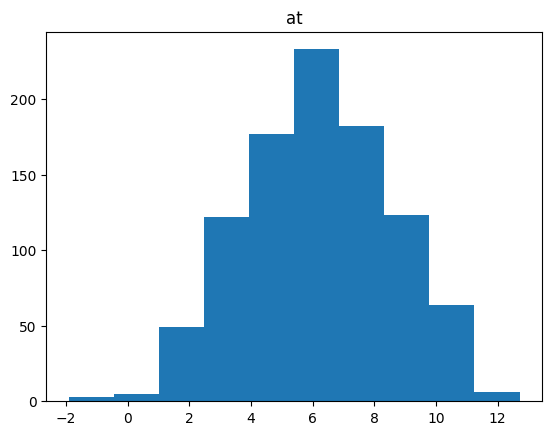

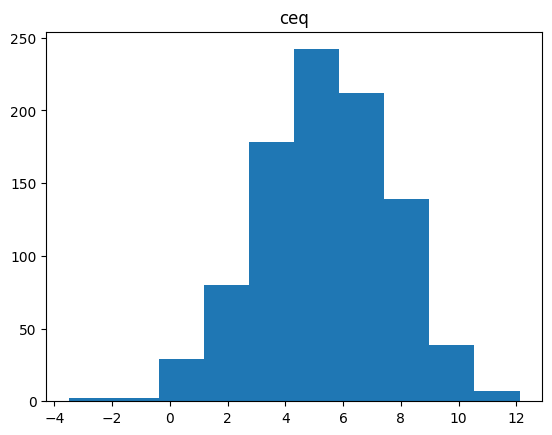

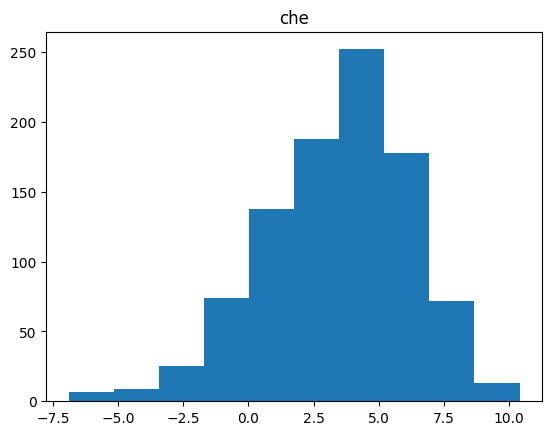

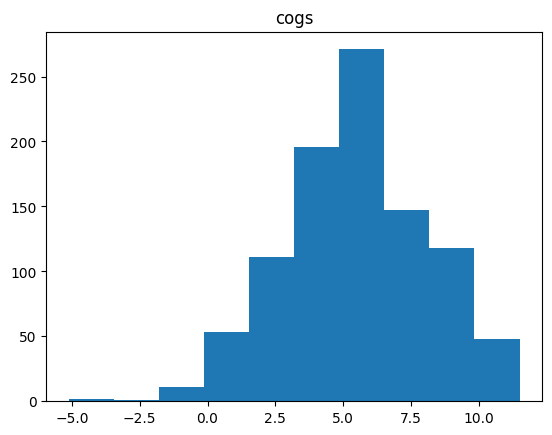

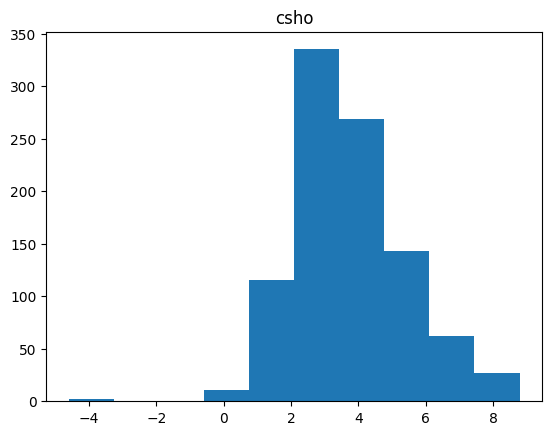

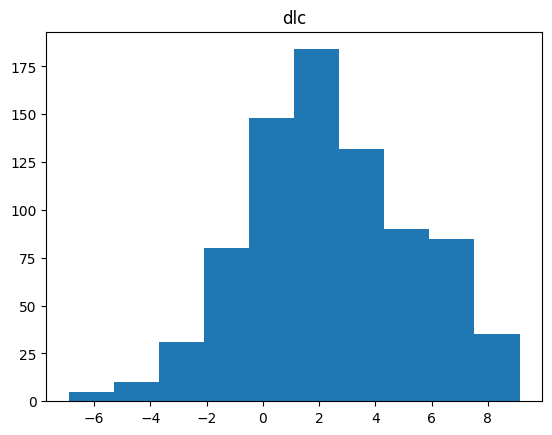

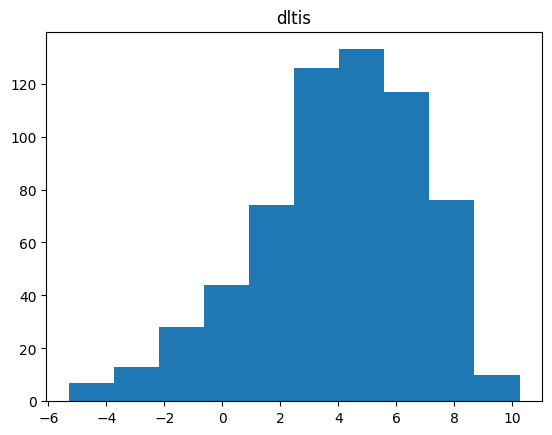

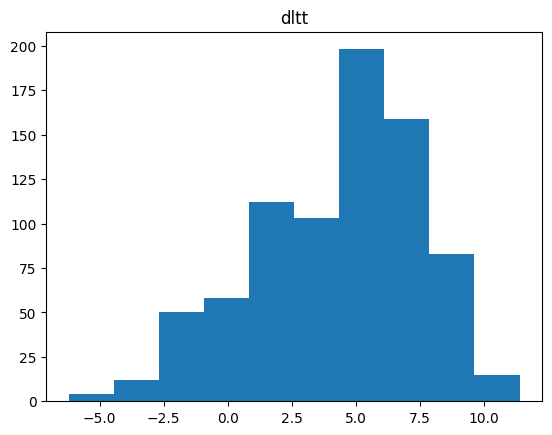

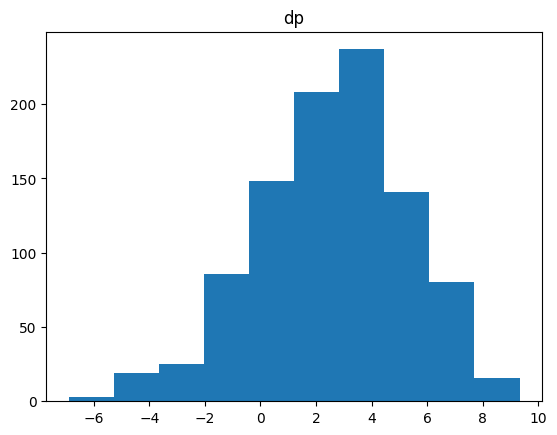

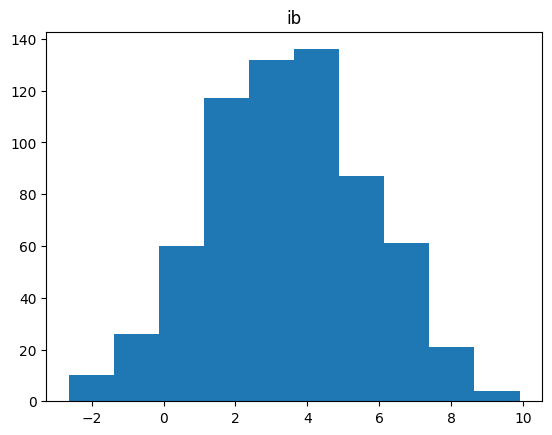

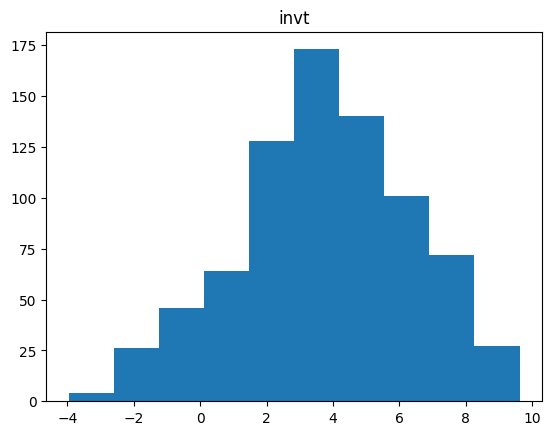

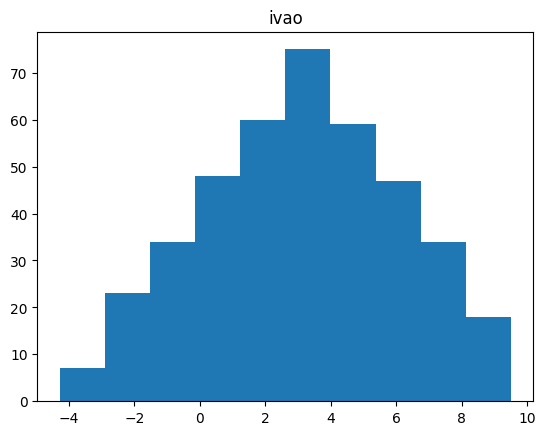

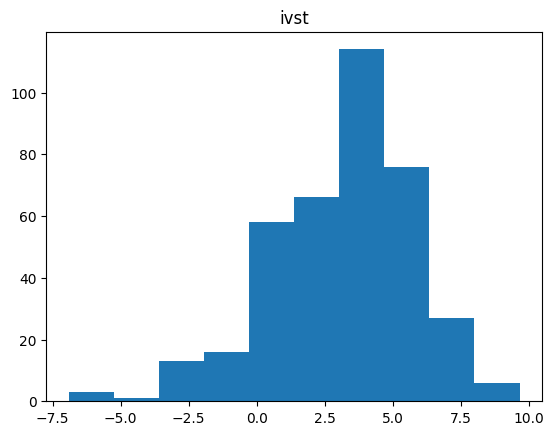

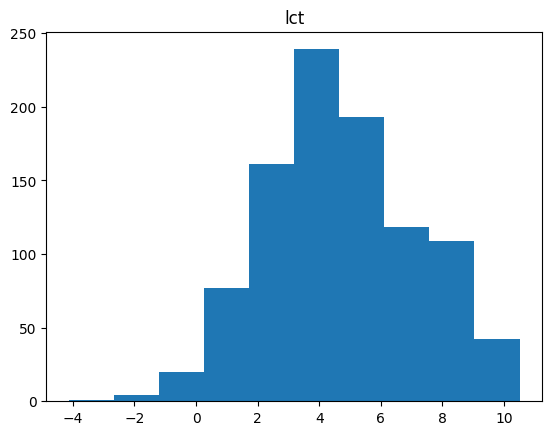

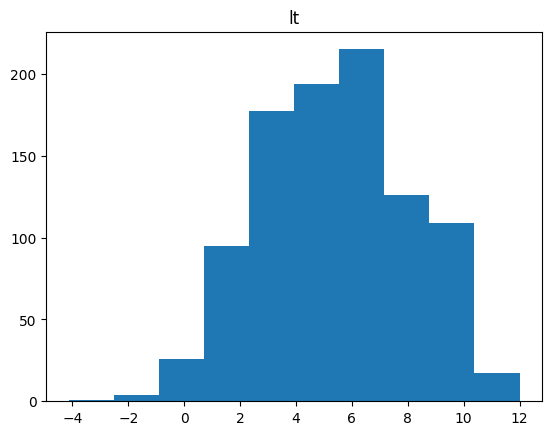

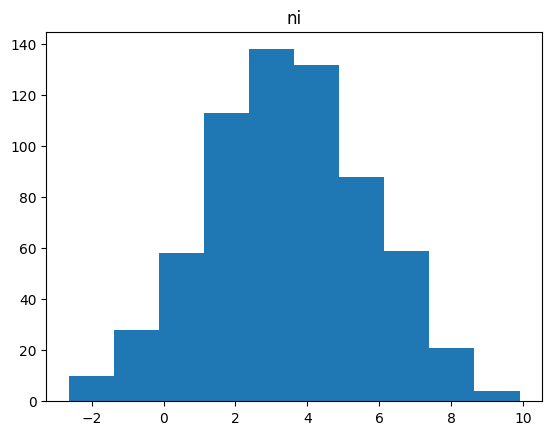

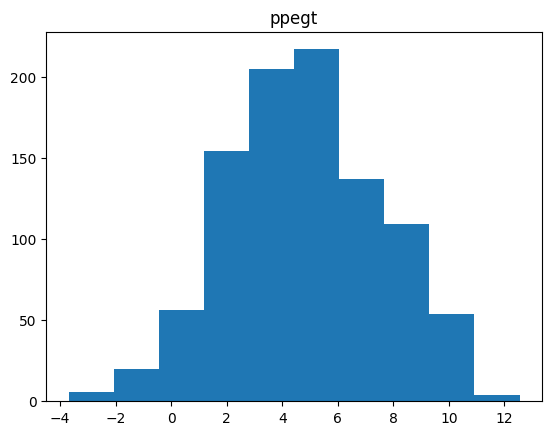

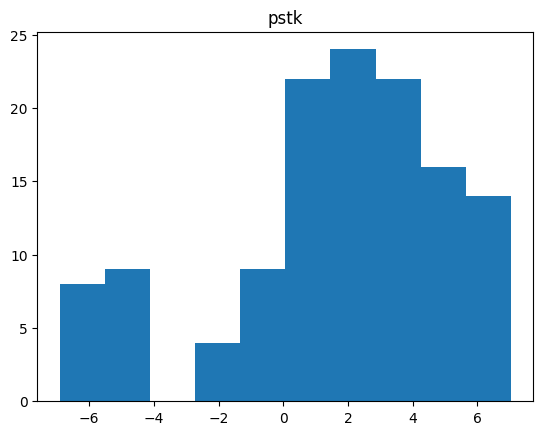

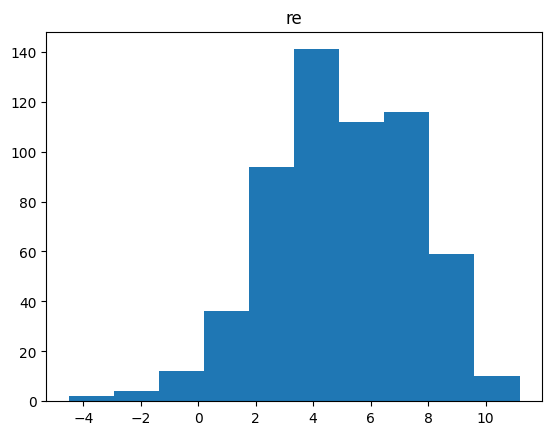

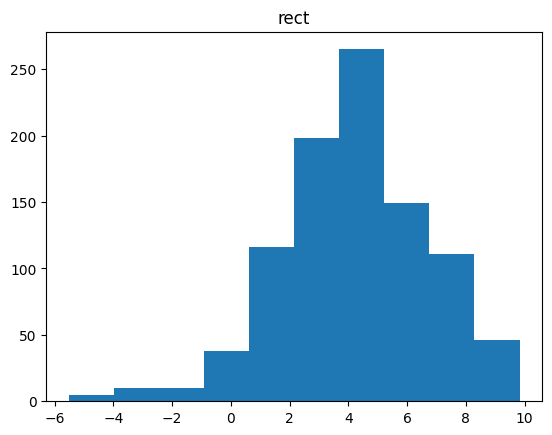

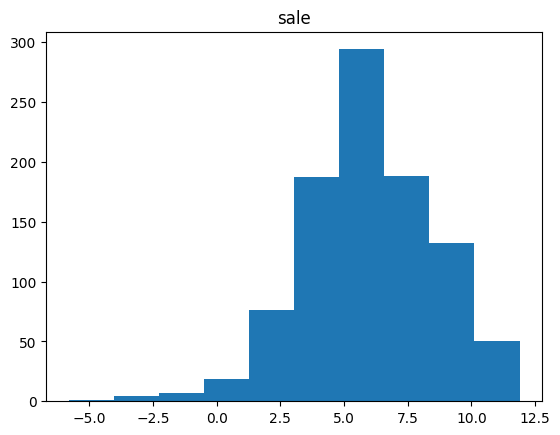

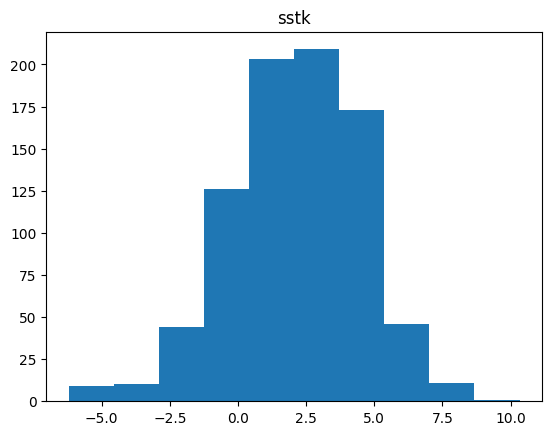

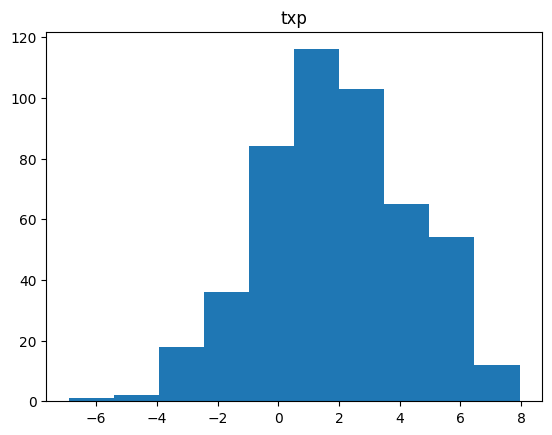

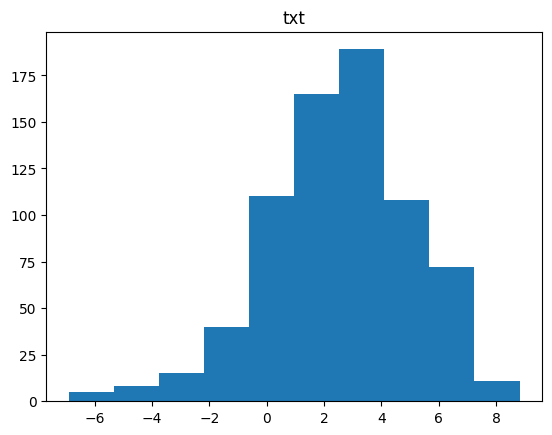

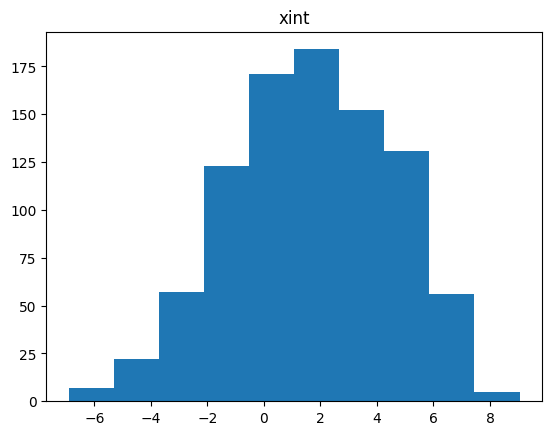

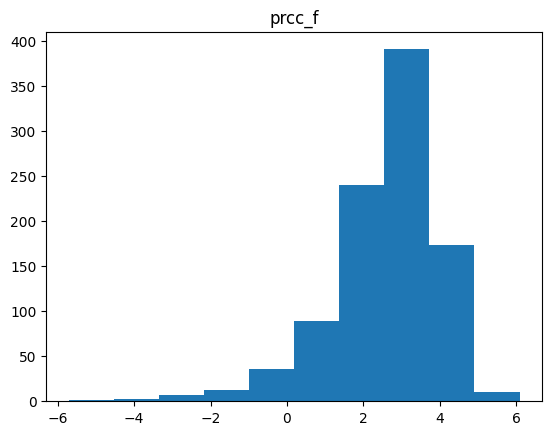

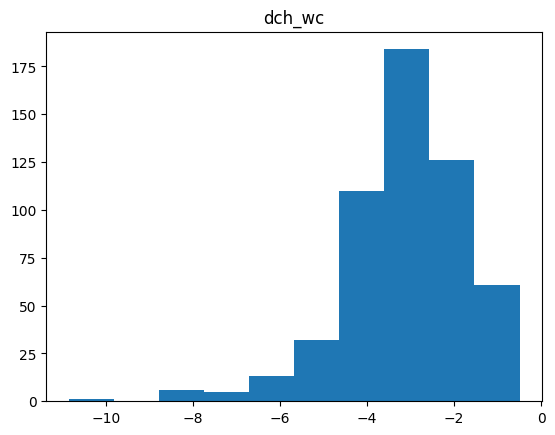

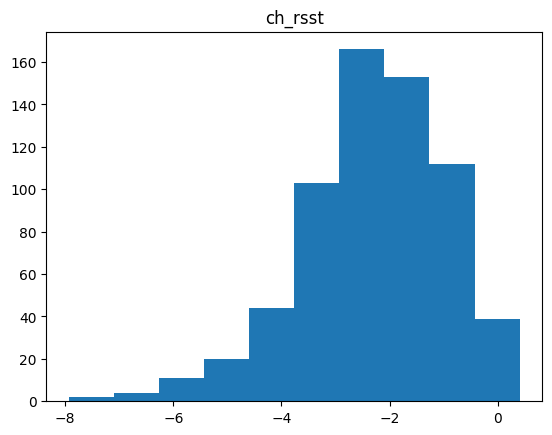

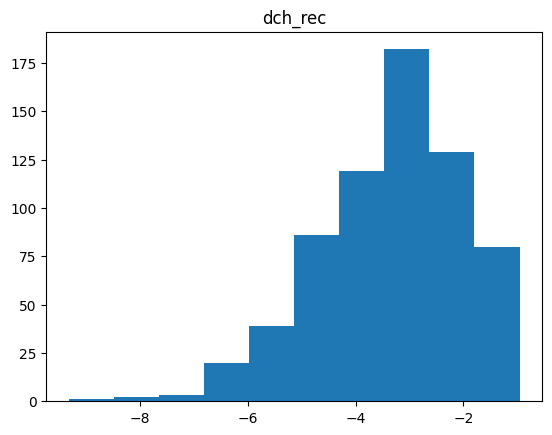

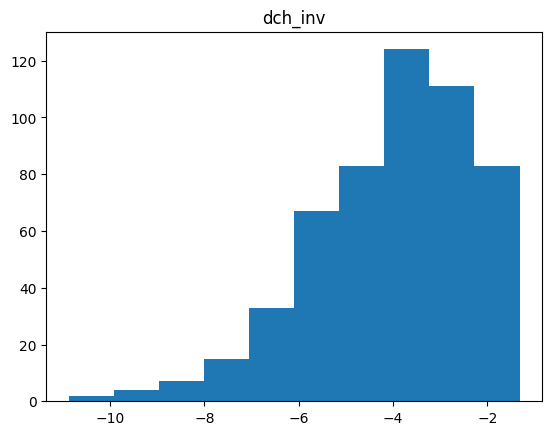

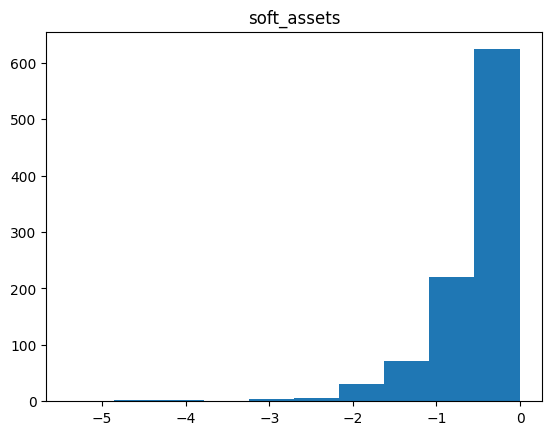

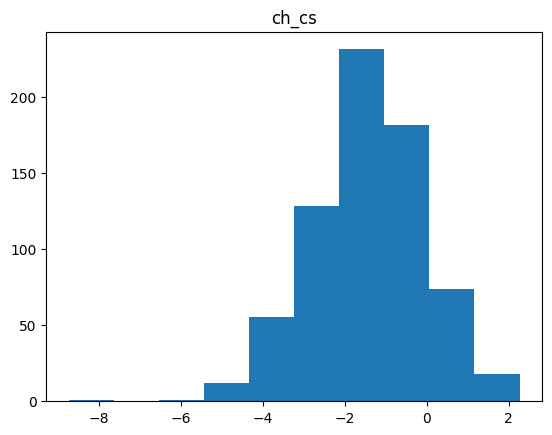

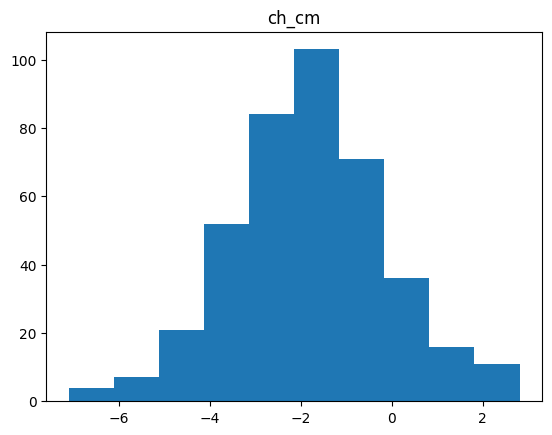

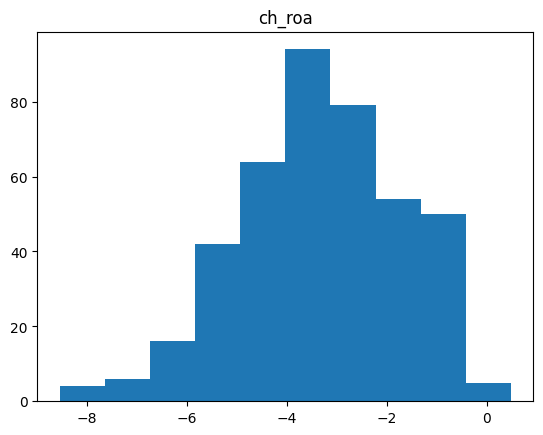

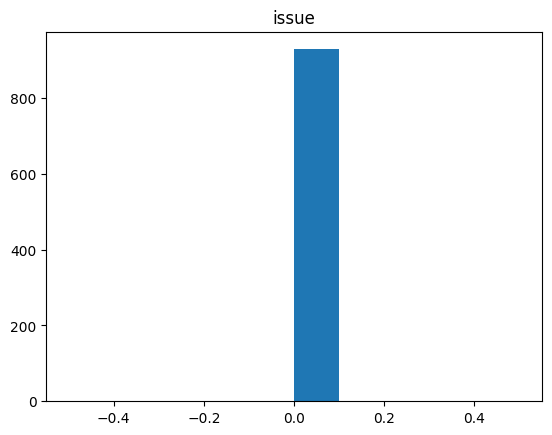

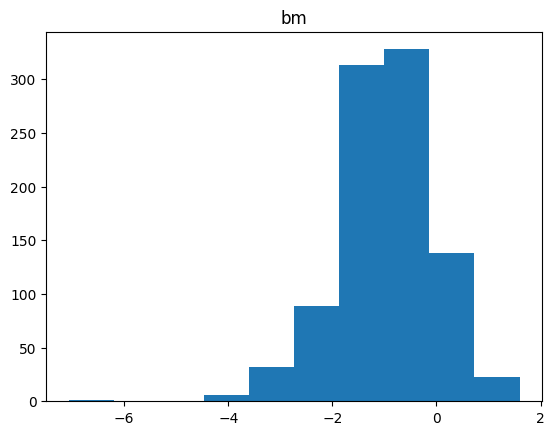

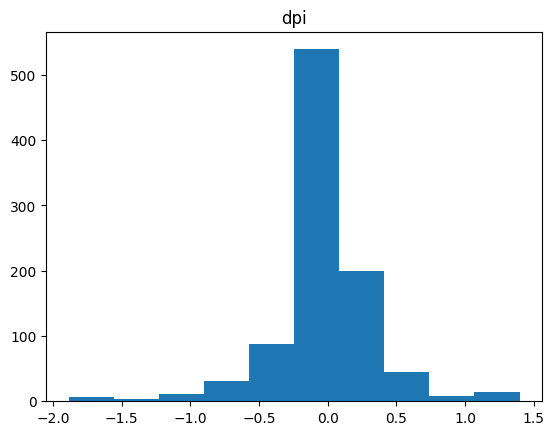

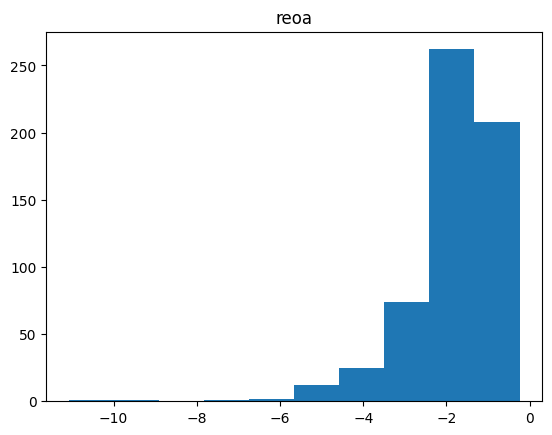

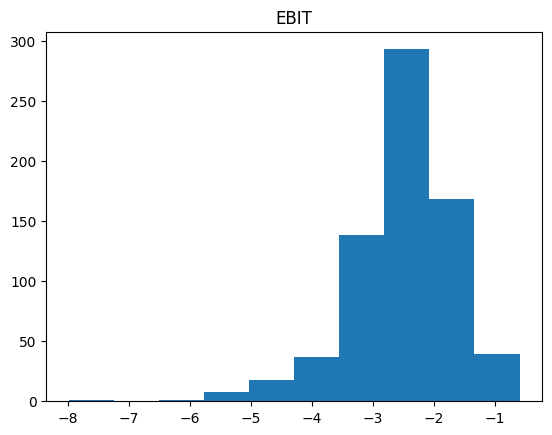

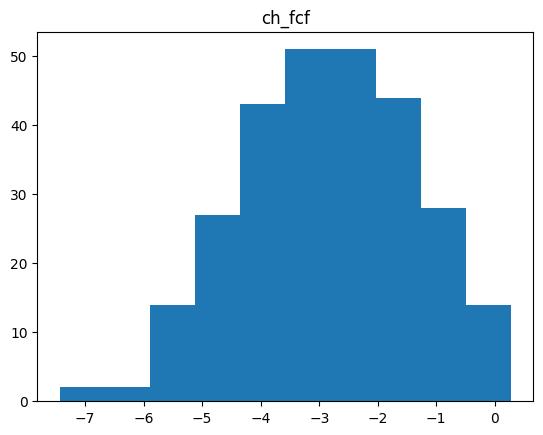

In [179]:
for cat in all_ft:
    plt.hist(df_1[cat].apply(lambda x: np.nan if x ==0 else np.log(x)),bins=20);
    plt.title(cat);
    plt.show();

In [14]:
df[all_ft].isna().sum()/len(df)

act            0.000000
ap             0.000000
at             0.000000
ceq            0.000000
che            0.000000
cogs           0.000000
csho           0.000000
dlc            0.000000
dltis          0.000000
dltt           0.000000
dp             0.000000
ib             0.000000
invt           0.000000
ivao           0.000000
ivst           0.000000
lct            0.000000
lt             0.000000
ni             0.000000
ppegt          0.000000
pstk           0.000000
re             0.000000
rect           0.000000
sale           0.000000
sstk           0.000000
txp            0.000000
txt            0.000000
xint           0.000000
prcc_f         0.000000
dch_wc         0.032586
ch_rsst        0.033216
dch_rec        0.032476
dch_inv        0.031600
soft_assets    0.004054
ch_cs          0.108994
ch_cm          0.117135
ch_roa         0.086809
issue          0.000000
bm             0.000123
dpi            0.063186
reoa           0.004047
EBIT           0.004047
ch_fcf         0

## Modeling

### Xgboost

In [22]:
df_clean=df[[*all_ft,'fyear','misstate']]

In [28]:
print(df_clean.loc[df_clean['fyear']<=2002]['misstate'].value_counts())

df_clean.loc[(df_clean['fyear']>2002)&(df_clean['fyear']<=2008)]['misstate'].value_counts()


0    77224
1      591
Name: misstate, dtype: int64


0    34905
1      261
Name: misstate, dtype: int64

In [29]:
print(df_clean.loc[df_clean['fyear']<=2008]['misstate'].value_counts())

df_clean.loc[(df_clean['fyear']>2008)&(df_clean['fyear']<=2014)]['misstate'].value_counts()


0    112129
1       852
Name: misstate, dtype: int64


0    32952
1      112
Name: misstate, dtype: int64

In [31]:
print(df_clean.loc[df_clean['fyear']<=2014]['misstate'].value_counts())

df_clean.loc[df_clean['fyear']>2014]['misstate'].value_counts()


0    145081
1       964
Name: misstate, dtype: int64


Series([], Name: misstate, dtype: int64)

In [35]:
x_train,y_train=df_clean.loc[df_clean['fyear']<=2008].drop(['misstate'],axis=1),df_clean.loc[df_clean['fyear']<=2008]['misstate']
x_test,y_test=df_clean.loc[(df_clean['fyear']>2008)&(df_clean['fyear']<=2014)].drop(['misstate'],axis=1),\
    df_clean.loc[(df_clean['fyear']>2008)&(df_clean['fyear']<=2014)]['misstate']

In [40]:
random_under_sampler=RandomUnderSampler(random_state=1)
x,y=random_under_sampler.fit_resample(x_train,y_train)

In [52]:
xgbr=xgb.XGBClassifier(max_depth=10)
xgbr.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
print(confusion_matrix(y_test,xgbr.predict(x_test)))

[[24212  8740]
 [   49    63]]


In [58]:
y_pred_all=xgbr.predict_proba(x_test)[:,1]

In [59]:
df_res=pd.DataFrame(
    {
        "label":y_test,
        'pred_proba':y_pred_all
    }
)

In [60]:
df_1=df_res.sort_values('pred_proba',ascending=False)[:int(df_res.__len__()/100)]


In [61]:
df_1.label.value_counts()

0    327
1      3
Name: label, dtype: int64

### Isolated tree

In [134]:
iso=IsolationForest(contamination=0.0075)
iso.fit(x_train.dropna(),y_train)

/Users/lap14171/Works/financial_fraud_detect/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0075)

In [135]:
pred=iso.decision_function(x_test.fillna(x_train.median()))

In [136]:
df_res=pd.DataFrame(
    {
        "label":y_test,
        'pred_proba':pred
    }
)

In [144]:
df_res.sort_values(['pred_proba'],ascending=False)[:int(df_res.__len__()/100)]['label'].value_counts()

0    330
Name: label, dtype: int64

## Auto encoder

In [69]:
std=StandardScaler()
x_train_ae=std.fit_transform(x_train)
x_test_ar=std.transform(x_test)

In [70]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset

In [71]:
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        # self.img_labels = pd.read_csv(annotations_file)
        self.data = df.astype(np.float32).values
        # self.img_dir = img_dir
        self.transform = transform
        # self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        # return 
        
        # img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # image = read_image(img_path)
        # label = self.img_labels.iloc[idx, 1]
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return self.data[idx]

In [106]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

dataset_va=CustomDataset(df[all_ft],transform=tensor_transform)
# Download the MNIST Dataset
# dataset = datasets.MNIST(root = "./data",
#                          train = True,
#                          download = True,
#                          transform = tensor_transform)


# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset_va,
                                     batch_size = 2,
                                     shuffle = True)

In [107]:
class AE(torch.nn.Module):
    def __init__(self,input_dim:int=42,latent_vector_dim:int=9):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 32),
            torch.nn.LeakyReLU(.1),
            torch.nn.Linear(32, latent_vector_dim)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(latent_vector_dim, 32),
            torch.nn.LeakyReLU(.1), 
            torch.nn.Linear(32, input_dim),
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [108]:
model = AE(latent_vector_dim=3)
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

In [109]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for image in loader:

        # Reshaping the image to (-1, 784)
        # image = image

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)
        

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        print(loss)
        losses.append(loss)
        
    outputs.append((epochs, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

tensor(630665.6875, grad_fn=<MseLossBackward0>)
tensor(7963293.5000, grad_fn=<MseLossBackward0>)
tensor(99.3802, grad_fn=<MseLossBackward0>)
tensor(68869.8359, grad_fn=<MseLossBackward0>)
tensor(7129.9546, grad_fn=<MseLossBackward0>)
tensor(73341.2578, grad_fn=<MseLossBackward0>)
tensor(266416.1250, grad_fn=<MseLossBackward0>)
tensor(226769.9062, grad_fn=<MseLossBackward0>)
tensor(11847379., grad_fn=<MseLossBackward0>)
tensor(172.2236, grad_fn=<MseLossBackward0>)
tensor(1019.0374, grad_fn=<MseLossBackward0>)
tensor(46.8757, grad_fn=<MseLossBackward0>)
tensor(63091.0430, grad_fn=<MseLossBackward0>)
tensor(48.9728, grad_fn=<MseLossBackward0>)
tensor(247351.8125, grad_fn=<MseLossBackward0>)
tensor(51154.0586, grad_fn=<MseLossBackward0>)
tensor(31808.7148, grad_fn=<MseLossBackward0>)
tensor(128.2204, grad_fn=<MseLossBackward0>)
tensor(5817332., grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)
tensor(nan, grad_fn=<MseLossBackward0>)

KeyboardInterrupt: 